### Introduction to artificial intelligence

This notebook contains a Script with a implementation of neural network for regression problem.

Author:
    Oscar Hernández Terán
    
Bachelor's Degree:
    Geophysical Engineer

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
import keras

In [6]:
# We load the data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
# We cech the names of the features 
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
# Split arrays or matrices into random train and test subsets 
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [10]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
# We initialize the values to retrieve random numbers
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape

(11610, 8)

In [13]:
# Here create the neural network
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [15]:
# Features of ANN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [18]:
# We compile the model
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

In [19]:
# We train the ANN
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 0s 839us/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 0s 735us/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 0s 738us/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 0s 744us/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 0s 744us/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 0s 734us/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 0s 772us/s

In [20]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 584us/step - loss: 0.3596 - mae: 0.4269


In [22]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.3828714191913605,
  0.3807542324066162,
  0.3787873089313507,
  0.37684252858161926,
  0.37485161423683167,
  0.3732492923736572,
  0.37154120206832886,
  0.3699617087841034,
  0.36844807863235474,
  0.3671077489852905,
  0.36586400866508484,
  0.364767462015152,
  0.36347660422325134,
  0.36217090487480164,
  0.3612859845161438],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.4414599537849426,
  0.4398252069950104,
  0.43846991658210754,
  0.43753182888031006,
  0.4359447658061981,
  0.43472516536712646,
  0.43356847763061523,
  0.43265366554260254,
  0.43151575326919556,
  0.43066665530204773,
  0.43046438694000244,
  0.42939263582229614,
  0.42837896943092346,
  0.42722663283348083,
  0.42688435316085815],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.3646637797355652,
  0.363

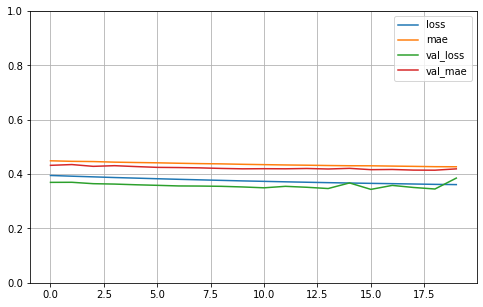

In [23]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(b=True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
X_new = X_test[:3]

In [27]:
# Command predict for do the regression
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.6071852]
 [1.8601747]
 [3.7925048]]
[0.477   0.458   5.00001]
